#### Loading Libraries

In [1]:
# for printing multiple outputs in a cell without print
from IPython.display import Image;from datetime import date
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## calling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
ConfusionMatrixDisplay,classification_report,roc_auc_score,f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline,Pipeline
import seaborn as sns
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Data cleaning and visualisation was done in excel and report was shared as well in phase 1.

#### Reading file

In [3]:
df = pd.read_excel('C:\\Users\\vishn\\Downloads\\niha_assignment\\vishnu\\ASM_Assignment1_Responses.xlsx', sheet_name='2.cleaned')
type(df) # type of dataframe
df.shape
df.head(3)


pandas.core.frame.DataFrame

(116, 21)

sl_nbr Gender clnd_Working_City Marriage status/ Kids  \
0       1   Male              Pune   Married and No Kids   
1       2   Male            Mumbai            Un Married   
2       3   Male            Mumbai            Un Married   

  Annual Salary (in Indian Rupees)  Please Mention your age in years  \
0                         35Lacs +                                31   
1                 15Lacs to 20Lacs                                30   
2                 20Lacs to 25Lacs                                28   

   Work Experience (in years)  \
0                           6   
1                           3   
2                           3   

   clnd_Average Time to Commute to office one way (in minutes)  \
0                                                0.0             
1                                               30.0             
2                                               90.0             

         clnd_Type of Industry  clnd_Job Profile  ...  \
0  Banking, Finance & Insurance       Technology  ...   
1  Banking, Finance & Insurance           Others  ...   
2  Banking, Finance & Insurance       Technology  ...   

               Employment Type Flexibility in office Timings  \
0  Permanent - Company Payroll      Semi-Fixed working hours   
1  Permanent - Company Payroll           Fixed working hours   
2  Permanent - Company Payroll      Semi-Fixed working hours   

  Number of total paid leave (Paid + Sick)              Working days in Week  \
0                                       40              Mon to Fri or 5 days   
1                                       21  Mon to Fri & Alternate Saturdays   
2                                       22  Mon to Fri & Alternate Saturdays   

  day_hrs_per_week  clnd_Actual Work hours per week (in hours)  \
0              5.0                                        55.0   
1              5.5                                        54.0   
2              5.5                                        60.0   

   Clnd_Designated work hours per week that a person is expected to work (In hours)  \
0                                               45.0                                  
1                                               45.0                                  
2                                               45.0                                  

   Actual_work_hours_per_desogmated_work_hours  How is your Work-Life Balance  \
0                                     1.222222                           Good   
1                                     1.200000                           Fair   
2                                     1.333333                           Good   

  GTE_Fair_Worklife_balance  
0                         1  
1                         1  
2                         1  

[3 rows x 21 columns]

In [4]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [5]:
df["How is your Work-Life Balance"].value_counts()
#gives count of each values in a column

How is your Work-Life Balance
Good         52
Fair         34
Excellent    14
Poor         10
Very Poor     6
Name: count, dtype: int64

In [6]:
df.rename(columns = {'GTE_Fair_Worklife_balance':"Good_Worklife"},inplace= True)# Renaming the column
#df.rename(columns = {'GTE_Fair_Worklife_balance':"Good_Worklife"},inplace= True)

#### Creating Target or independent Variable

In [7]:
df["Good_Worklife"] = np.where(df["How is your Work-Life Balance"].isin(['Excellent','Good','Fair']),1,0)
#  when worklife is good(excellent,good,fair) it is 1 and in very,poor its 0 
df["Good_Worklife"].value_counts()

Good_Worklife
1    100
0     16
Name: count, dtype: int64

In [8]:
type(df) # type tells if it is list, tuple, dictionary, series or dataframe.
type(df.dtypes)
#print(df.dtypes) # returns data type of all columns of pd (pandas) df.
# pandas series = numpy array
#df.index
#df.columns

pandas.core.frame.DataFrame

pandas.core.series.Series

#### Checking Data Sanity

In [9]:
# for checking data summary
def data_info(df):
    df_info = pd.DataFrame(df.isna().sum(),columns = ['Null_count'])
    df_info['N_unique'] = df_info.index.map(df.nunique())
    df_info['D_types'] = df_info.index.map(df.dtypes)
    df_info['Blank_count'] = df_info.index.map((df=='').sum())
    return df_info

In [10]:
data_info(df) # We get null cnt,unique, blanks in a single table.  
#data_info(df).to_csv("smry.csv")

Null_count  N_unique  \
sl_nbr                                                       0       116   
Gender                                                       0         2   
clnd_Working_City                                            0         7   
Marriage status/ Kids                                        0         3   
Annual Salary (in Indian Rupees)                             0         8   
Please Mention your age in years                             0        23   
Work Experience (in years)                                   0        23   
clnd_Average Time to Commute to office one way ...           0        23   
clnd_Type of Industry                                        0         7   
clnd_Job Profile                                             0         6   
Work Mode                                                    0         3   
Employment Type                                              0         4   
Flexibility in office Timings                                0         3   
Number of total paid leave (Paid + Sick)                     0        38   
Working days in Week                                         0         3   
day_hrs_per_week                                             0         3   
clnd_Actual Work hours per week (in hours)                   0        24   
Clnd_Designated work hours per week that a pers...           0        18   
Actual_work_hours_per_desogmated_work_hours                  0        35   
How is your Work-Life Balance                                0         5   
Good_Worklife                                                0         2   

                                                    D_types  Blank_count  
sl_nbr                                                int64            0  
Gender                                               object            0  
clnd_Working_City                                    object            0  
Marriage status/ Kids                                object            0  
Annual Salary (in Indian Rupees)                     object            0  
Please Mention your age in years                      int64            0  
Work Experience (in years)                            int64            0  
clnd_Average Time to Commute to office one way ...  float64            0  
clnd_Type of Industry                                object            0  
clnd_Job Profile                                     object            0  
Work Mode                                            object            0  
Employment Type                                      object            0  
Flexibility in office Timings                        object            0  
Number of total paid leave (Paid + Sick)              int64            0  
Working days in Week                                 object            0  
day_hrs_per_week                                    float64            0  
clnd_Actual Work hours per week (in hours)          float64            0  
Clnd_Designated work hours per week that a pers...  float64            0  
Actual_work_hours_per_desogmated_work_hours         float64            0  
How is your Work-Life Balance                        object            0  
Good_Worklife                                         int32            0

#### Label Encoding of Ordinal Variable

In [11]:
#df["Annual Salary (in Indian Rupees)"].unique()
df['enc_salary'] = np.select([   
        df["Annual Salary (in Indian Rupees)"] == '0 to 5 Lacs', 
        df["Annual Salary (in Indian Rupees)"] == '5Lacs to 10Lacs',
        df["Annual Salary (in Indian Rupees)"] == '10Lacs to 15Lacs',
        df["Annual Salary (in Indian Rupees)"] == '15Lacs to 20Lacs',
        df["Annual Salary (in Indian Rupees)"] == '20Lacs to 25Lacs',
        df["Annual Salary (in Indian Rupees)"] == '25Lacs to 30Lacs',
        df["Annual Salary (in Indian Rupees)"] == '30Lacs to 35Lacs',
        df["Annual Salary (in Indian Rupees)"] == '35Lacs +' ], 
        [ 1,2,3,4,5,6,7,8], 
        default= -999 )
df.groupby(["enc_salary"])["enc_salary"].count()

enc_salary
1    23
2    34
3    22
4    15
5    10
6     4
7     2
8     6
Name: enc_salary, dtype: int64

In [12]:
#dropping unnecessary columns
df = df.drop(['sl_nbr','Working days in Week','How is your Work-Life Balance',"Annual Salary (in Indian Rupees)"], axis=1, errors = "ignore")
df.shape
#df.drop('Working days in Week', axis=1, inplace=True)
df.head(2)

(116, 18)

Gender clnd_Working_City Marriage status/ Kids  \
0   Male              Pune   Married and No Kids   
1   Male            Mumbai            Un Married   

   Please Mention your age in years  Work Experience (in years)  \
0                                31                           6   
1                                30                           3   

   clnd_Average Time to Commute to office one way (in minutes)  \
0                                                0.0             
1                                               30.0             

         clnd_Type of Industry  clnd_Job Profile               Work Mode  \
0  Banking, Finance & Insurance       Technology    Work From Home (WFH)   
1  Banking, Finance & Insurance           Others  Work From Office (WFO)   

               Employment Type Flexibility in office Timings  \
0  Permanent - Company Payroll      Semi-Fixed working hours   
1  Permanent - Company Payroll           Fixed working hours   

   Number of total paid leave (Paid + Sick)  day_hrs_per_week  \
0                                        40               5.0   
1                                        21               5.5   

   clnd_Actual Work hours per week (in hours)  \
0                                        55.0   
1                                        54.0   

   Clnd_Designated work hours per week that a person is expected to work (In hours)  \
0                                               45.0                                  
1                                               45.0                                  

   Actual_work_hours_per_desogmated_work_hours  Good_Worklife  enc_salary  
0                                     1.222222              1           8  
1                                     1.200000              1           4

#### One Hot Encoding for Nominal Variables

In [13]:
target = "Good_Worklife"
char_cols = list(df.select_dtypes("object").columns)
print(char_cols)

['Gender', 'clnd_Working_City', 'Marriage status/ Kids', 'clnd_Type of Industry ', 'clnd_Job Profile', 'Work Mode', 'Employment Type', 'Flexibility in office Timings']


In [14]:
#df[features]
df_ohe = 1*pd.get_dummies(df, columns= char_cols)
df_ohe.shape
df_ohe.head(1)

(116, 45)

Please Mention your age in years  Work Experience (in years)  \
0                                31                           6   

   clnd_Average Time to Commute to office one way (in minutes)  \
0                                                0.0             

   Number of total paid leave (Paid + Sick)  day_hrs_per_week  \
0                                        40               5.0   

   clnd_Actual Work hours per week (in hours)  \
0                                        55.0   

   Clnd_Designated work hours per week that a person is expected to work (In hours)  \
0                                               45.0                                  

   Actual_work_hours_per_desogmated_work_hours  Good_Worklife  enc_salary  \
0                                     1.222222              1           8   

   ...  Work Mode_Hybrid (WFH + WFO)  Work Mode_Work From Home (WFH)  \
0  ...                             0                               1   

   Work Mode_Work From Office (WFO)  Employment Type_Contract Basis  \
0                                 0                               0   

   Employment Type_Freelancing  Employment Type_Internship  \
0                            0                           0   

   Employment Type_Permanent - Company Payroll  \
0                                            1   

   Flexibility in office Timings_Fixed working hours  \
0                                                  0   

   Flexibility in office Timings_Liberal working hours  \
0                                                  0     

   Flexibility in office Timings_Semi-Fixed working hours  
0                                                  1       

[1 rows x 45 columns]

In [15]:
#checking if properly created
features = list(df_ohe.columns)
#features.remove(target)
features = [i for i in features if i != target]
print("Nbr of features after OHE - ", len(features))
print(features)

Nbr of features after OHE -  44
['Please Mention your age in years', 'Work Experience (in years)', 'clnd_Average Time to Commute to office one way (in minutes)', 'Number of total paid leave (Paid + Sick)', 'day_hrs_per_week', 'clnd_Actual Work hours per week (in hours)', 'Clnd_Designated work hours per week that a person is expected to work (In hours)', 'Actual_work_hours_per_desogmated_work_hours', 'enc_salary', 'Gender_Female', 'Gender_Male', 'clnd_Working_City_Bangalore', 'clnd_Working_City_Delhi & NCR', 'clnd_Working_City_Hyderabad', 'clnd_Working_City_Kochi', 'clnd_Working_City_Mumbai', 'clnd_Working_City_Others', 'clnd_Working_City_Pune', 'Marriage status/ Kids_Married and No Kids', 'Marriage status/ Kids_Married and have Kids', 'Marriage status/ Kids_Un Married', 'clnd_Type of Industry _Banking, Finance & Insurance', 'clnd_Type of Industry _Construction', 'clnd_Type of Industry _Consulting', 'clnd_Type of Industry _Information & Technology', 'clnd_Type of Industry _Manufacturing

## Principal Component Analysis

#### Scaling Features

In [16]:
# Scaling
pca_cols = df_ohe.columns

X_full = df_ohe[pca_cols].values
y_full = df_ohe[target].values

#Scaling the data
sclr = StandardScaler()
sclr.fit(X_full)

X_full = sclr.transform(X_full)

StandardScaler()

#### Fitting PCA and transforming data

In [17]:
#Perform the principal component analysis transformation
n_pca = 6
pca = PCA(n_components = n_pca)
pca.fit(X_full)

X_full_pca = pca.transform(X_full)

print(X_full_pca.shape)
print(X_full.shape)

PCA(n_components=6)

(116, 6)
(116, 45)


#### Scree plot to identify number of PCs

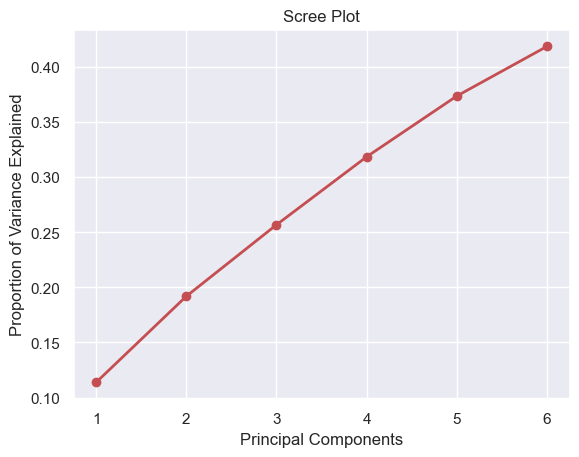

In [18]:
PC_values = np.arange(pca.n_components_) + 1
ax = plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
ax = plt.title('Scree Plot')
ax = plt.xlabel('Principal Components')
ax = plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()

In [19]:
# Transformed data with PCs
pca_df = pd.DataFrame(data = X_full_pca, columns = ["PC_" + str(i+1) for i in range(n_pca)])
pca_df[target] = y_full
print(pca_df.head())

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  Good_Worklife
0 -1.118421  3.703698  1.004818 -1.571204  0.258103 -1.709264              1
1  0.913263  1.210479  2.043876 -1.604504 -1.099988 -1.038024              1
2  0.347970  2.245523  1.322520 -3.134675 -1.108029 -1.792020              1
3  1.944730 -0.972964  4.871186  2.594364 -0.130363  1.603112              1
4  2.276553  1.595305 -1.133626 -2.256568 -2.449280 -0.291565              1


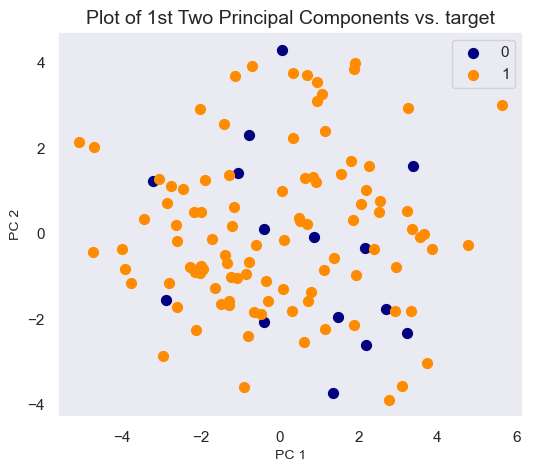

In [20]:
# Scatter plot of PC1 with PC2
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(1,1,1) 
_ = ax.set_xlabel('PC 1', fontsize = 10)
_ = ax.set_ylabel('PC 2', fontsize = 10)
_ = ax.set_title('Plot of 1st Two Principal Components vs. target', fontsize = 14)
levels = [0,1]
colors = ['navy', 'darkorange']
for lvl, color in zip(levels,colors):
    indicesToKeep = pca_df[target] == lvl
    _ = ax.scatter(pca_df.loc[indicesToKeep, 'PC_1']
               , pca_df.loc[indicesToKeep, 'PC_2']
               , c = color
               , s = 50)
_ = ax.legend(levels)
_ = ax.grid()

#### Variance Explained by top PCs

In [21]:
var_exp = pd.DataFrame(data=["PC_" + str(i+1) for i in range(n_pca)],columns=["PC"])
var_exp["variance_explained"] = pca.explained_variance_ratio_
var_exp["cumm_variance_explained"] = np.cumsum(pca.explained_variance_ratio_)
var_exp

PC  variance_explained  cumm_variance_explained
0  PC_1            0.113779                 0.113779
1  PC_2            0.078153                 0.191932
2  PC_3            0.064890                 0.256821
3  PC_4            0.061743                 0.318564
4  PC_5            0.055180                 0.373744
5  PC_6            0.045044                 0.418787

In [22]:
# components of PCs
components = pd.DataFrame(pca.components_,columns=pca_cols)
components.index = ["PC_" + str(i+1) for i in range(n_pca)]

#### Factor Loading

In [23]:
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),columns= ["PC_" + str(i+1) for i in range(n_pca)])
loadings.index = pca_cols
loadings.head(12)

PC_1      PC_2  \
Please Mention your age in years                   -0.774536  0.070142   
Work Experience (in years)                         -0.802546 -0.034199   
clnd_Average Time to Commute to office one way ... -0.233754  0.101935   
Number of total paid leave (Paid + Sick)           -0.440710  0.355155   
day_hrs_per_week                                   -0.057278 -0.537487   
clnd_Actual Work hours per week (in hours)         -0.259375 -0.255780   
Clnd_Designated work hours per week that a pers... -0.192778 -0.279057   
Actual_work_hours_per_desogmated_work_hours         0.081589  0.019496   
Good_Worklife                                      -0.074914  0.083400   
enc_salary                                         -0.411803  0.529387   
Gender_Female                                       0.544748  0.166406   
Gender_Male                                        -0.544748 -0.166406   

                                                        PC_3      PC_4  \
Please Mention your age in years                   -0.029179  0.168792   
Work Experience (in years)                         -0.058589  0.179494   
clnd_Average Time to Commute to office one way ... -0.070049 -0.264204   
Number of total paid leave (Paid + Sick)            0.230595  0.065180   
day_hrs_per_week                                    0.053791  0.171831   
clnd_Actual Work hours per week (in hours)          0.245169 -0.428111   
Clnd_Designated work hours per week that a pers...  0.282811 -0.397469   
Actual_work_hours_per_desogmated_work_hours        -0.185803  0.027717   
Good_Worklife                                       0.277759  0.167569   
enc_salary                                         -0.117286 -0.017671   
Gender_Female                                       0.290716  0.537841   
Gender_Male                                        -0.290716 -0.537841   

                                                        PC_5      PC_6  
Please Mention your age in years                    0.153964  0.372815  
Work Experience (in years)                          0.180358  0.327340  
clnd_Average Time to Commute to office one way ... -0.265520  0.229723  
Number of total paid leave (Paid + Sick)            0.066627 -0.154948  
day_hrs_per_week                                    0.250949  0.178965  
clnd_Actual Work hours per week (in hours)          0.365630  0.002530  
Clnd_Designated work hours per week that a pers...  0.239570  0.044846  
Actual_work_hours_per_desogmated_work_hours         0.513712 -0.034392  
Good_Worklife                                      -0.471702  0.062484  
enc_salary                                          0.266859  0.195151  
Gender_Female                                       0.055887 -0.075928  
Gender_Male                                        -0.055887  0.075928

#### Variable Contribution for each PCs

In [24]:
dff = np.round(100*abs(loadings)/abs(loadings).sum(),2)
dff.head(12)

PC_1  PC_2  PC_3  PC_4  \
Please Mention your age in years                    6.44  0.73  0.29  1.80   
Work Experience (in years)                          6.67  0.36  0.58  1.92   
clnd_Average Time to Commute to office one way ...  1.94  1.06  0.69  2.82   
Number of total paid leave (Paid + Sick)            3.66  3.69  2.28  0.70   
day_hrs_per_week                                    0.48  5.59  0.53  1.84   
clnd_Actual Work hours per week (in hours)          2.16  2.66  2.43  4.57   
Clnd_Designated work hours per week that a pers...  1.60  2.90  2.80  4.25   
Actual_work_hours_per_desogmated_work_hours         0.68  0.20  1.84  0.30   
Good_Worklife                                       0.62  0.87  2.75  1.79   
enc_salary                                          3.42  5.50  1.16  0.19   
Gender_Female                                       4.53  1.73  2.88  5.75   
Gender_Male                                         4.53  1.73  2.88  5.75   

                                                    PC_5  PC_6  
Please Mention your age in years                    1.84  4.61  
Work Experience (in years)                          2.15  4.05  
clnd_Average Time to Commute to office one way ...  3.17  2.84  
Number of total paid leave (Paid + Sick)            0.80  1.92  
day_hrs_per_week                                    2.99  2.21  
clnd_Actual Work hours per week (in hours)          4.36  0.03  
Clnd_Designated work hours per week that a pers...  2.86  0.55  
Actual_work_hours_per_desogmated_work_hours         6.13  0.43  
Good_Worklife                                       5.63  0.77  
enc_salary                                          3.18  2.41  
Gender_Female                                       0.67  0.94  
Gender_Male                                         0.67  0.94

## Logistic Regression
* Developing Logistic Regression model to predict if person has good or poor worklife balance

#### Stratified Random Sampling & checking event rate
* Splitting the overall data into train and test using Holdout Cross Validation
* Since Stratified Sampling is done, Event rate of train and test data will be similar to that of overall data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_ohe[features],\
                df_ohe[target],test_size = 0.3, random_state =51,stratify  = df_ohe[target])
X_train.shape, X_test.shape ##np.unique (y_train, return_counts=True)
print("Event Rate of full data\n", round(100*df_ohe[target].value_counts(normalize = True),2),"\n")
print("Event Rate of train\n",  round(100*pd.Series(y_train).value_counts(normalize = True),2),"\n")
print("Event Rate of test\n",  round(100*pd.Series(y_train).value_counts(normalize = True),2),"\n")

((81, 44), (35, 44))

Event Rate of full data
 Good_Worklife
1    86.21
0    13.79
Name: proportion, dtype: float64 

Event Rate of train
 Good_Worklife
1    86.42
0    13.58
Name: proportion, dtype: float64 

Event Rate of test
 Good_Worklife
1    86.42
0    13.58
Name: proportion, dtype: float64 



#### Correlation Matrix on Numerical Data 

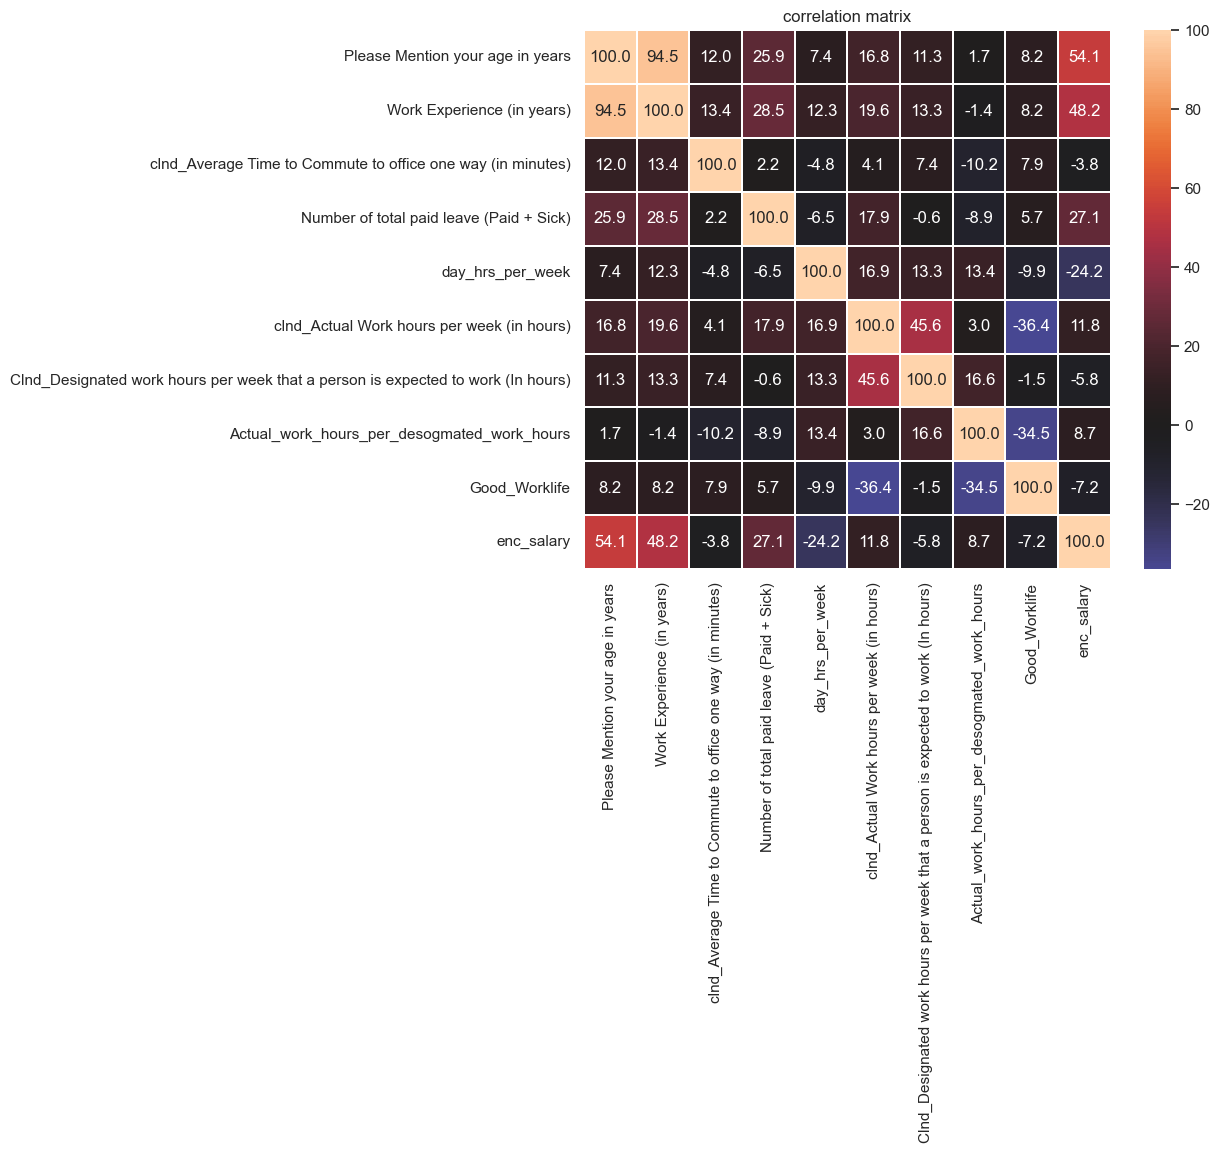

In [26]:
cor_mat = df_ohe[df.select_dtypes(np.number).columns].corr()
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
fig, ax = plt.subplots(figsize=(8.5,7)) ;
x = sns.heatmap(100*cor_mat, annot=True,fmt='.1f',center=0,linewidths = 0.25).set_title('correlation matrix')
plt.show()

#### Scaling the data
* Scaling data helps in identifying featureimportance of the data as it brings all the features on same scale

In [27]:
scaler = StandardScaler()
logreg = LogisticRegression(solver='saga',l1_ratio = 0.75,penalty = "elasticnet")

In [28]:
#creating and fitting pipe
from sklearn.pipeline import make_pipeline,Pipeline
pipe = Pipeline([('sc', scaler), ('lr', logreg)])
#pipe[0] #pipe[1]
pipe.fit(X_train, y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('lr',
                 LogisticRegression(l1_ratio=0.75, penalty='elasticnet',
                                    solver='saga'))])

#### Fature Importance

In [29]:
f'intercept is {pipe[1].intercept_}'
coff = pd.DataFrame({'variable' : df_ohe[features].columns, 'coefficient' : pipe[1].coef_.transpose().flatten()})
coff = coff.sort_values(by='coefficient', key=abs,ascending = False).reset_index(drop = True)
coff.head(10)

'intercept is [2.90150349]'

variable  coefficient
0         clnd_Actual Work hours per week (in hours)    -1.523864
1        Actual_work_hours_per_desogmated_work_hours    -1.147879
2  Clnd_Designated work hours per week that a per...     0.969607
3          Marriage status/ Kids_Married and No Kids     0.763332
4                           clnd_Working_City_Others     0.500441
5                                   day_hrs_per_week    -0.345384
6                        clnd_Working_City_Bangalore    -0.315979
7                   Please Mention your age in years     0.290894
8                                         enc_salary     0.227292
9  clnd_Average Time to Commute to office one way...     0.215068

In [30]:
#Taking top n features as per ask in assignment that varaibles should be between 4-8
features_n = coff.variable[:9]
features_n

0           clnd_Actual Work hours per week (in hours)
1          Actual_work_hours_per_desogmated_work_hours
2    Clnd_Designated work hours per week that a per...
3            Marriage status/ Kids_Married and No Kids
4                             clnd_Working_City_Others
5                                     day_hrs_per_week
6                          clnd_Working_City_Bangalore
7                     Please Mention your age in years
8                                           enc_salary
Name: variable, dtype: object

#### Redeveloping Logistic Regression with top n vars

In [31]:
pipe_lr = Pipeline([('sc', scaler), ('lr', logreg)])
pipe_lr.fit(X_train[features_n], y_train)

y_train_pred = pipe_lr.predict(X_train[features_n])
y_test_pred = pipe_lr.predict(X_test[features_n])

Pipeline(steps=[('sc', StandardScaler()),
                ('lr',
                 LogisticRegression(l1_ratio=0.75, penalty='elasticnet',
                                    solver='saga'))])

In [32]:
pipe_n = Pipeline([('sc', scaler), ('lr', logreg)])
#pipe[0]
#pipe[1]
pipe_n.fit(X_train[features_n], y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('lr',
                 LogisticRegression(l1_ratio=0.75, penalty='elasticnet',
                                    solver='saga'))])

In [33]:
estimator= pipe_n
pred_bin_tr = estimator.predict(X_train[features_n])
pred_bin_te = estimator.predict(X_test[features_n])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train[features_n])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test[features_n])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
#f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.987 ; test_rocaauc : 0.8067'

'train_f1_score : 0.965 ; test_f1_score : 0.9'

'train_precision : 0.9452 ; test_precision : 0.9'

'train_recall : 0.9857 ; test_recall : 0.9'

'train_accuracy : 0.9383 ; test_accuracy : 0.8286'

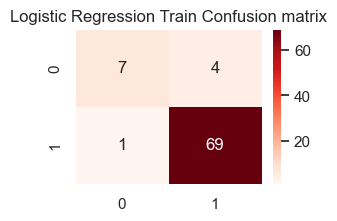

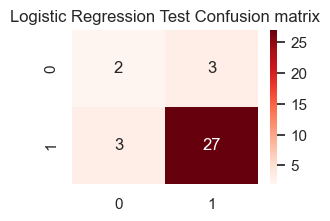

In [34]:
cf_tr = confusion_matrix(y_train,pred_bin_tr);#cf_tr
cf_te = confusion_matrix(y_test,pred_bin_te);#cf_te
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_tr, annot=True, cmap='Reds',fmt='.0f',).set_title('Logistic Regression Train Confusion matrix')
plt.show()
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_te, annot=True, cmap='Reds',fmt='.0f',).set_title('Logistic Regression Test Confusion matrix')
plt.show()

In [35]:
f'intercept is {pipe[1].intercept_}'
coff = pd.DataFrame({'variable' : df_ohe[features_n].columns, 'coefficient' : pipe_n[1].coef_.transpose().flatten()})
coff = coff.sort_values(by='coefficient', key=abs,ascending = False).reset_index(drop = True)
coff

'intercept is [3.08797105]'

variable  coefficient
0         clnd_Actual Work hours per week (in hours)    -1.747855
1        Actual_work_hours_per_desogmated_work_hours    -1.300674
2  Clnd_Designated work hours per week that a per...     1.082434
3          Marriage status/ Kids_Married and No Kids     0.815270
4                           clnd_Working_City_Others     0.515966
5                                   day_hrs_per_week    -0.429448
6                        clnd_Working_City_Bangalore    -0.360012
7                                         enc_salary     0.317782
8                   Please Mention your age in years     0.183325

#### Checking performance Metrics

In [36]:
estimator= pipe_lr
pred_bin_tr = estimator.predict(X_train[features_n])
pred_bin_te = estimator.predict(X_test[features_n])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train[features_n])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test[features_n])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
#f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.987 ; test_rocaauc : 0.8067'

'train_f1_score : 0.965 ; test_f1_score : 0.9'

'train_precision : 0.9452 ; test_precision : 0.9'

'train_recall : 0.9857 ; test_recall : 0.9'

'train_accuracy : 0.9383 ; test_accuracy : 0.8286'

#### Creating Confusiion Matrix

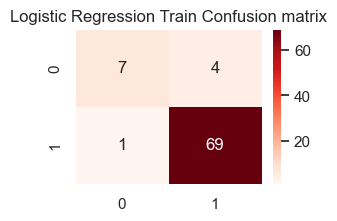

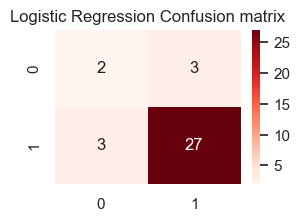

In [37]:
cf_tr = confusion_matrix(y_train,pred_bin_tr);#cf_tr
cf_te = confusion_matrix(y_test,pred_bin_te);#cf_te
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_tr, annot=True, cmap='Reds',fmt='.0f',).set_title('Logistic Regression Train Confusion matrix')
plt.show()
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_te, annot=True, cmap='Reds',fmt='.0f',).set_title('Logistic Regression Confusion matrix')
plt.show()

## Clustering

### Feature Importance

In [38]:
scaler = scaler.fit(X_train[features_n])
X_train_scl = scaler.transform(X_train[features_n])
X_test_scl = scaler.transform(X_test[features_n])

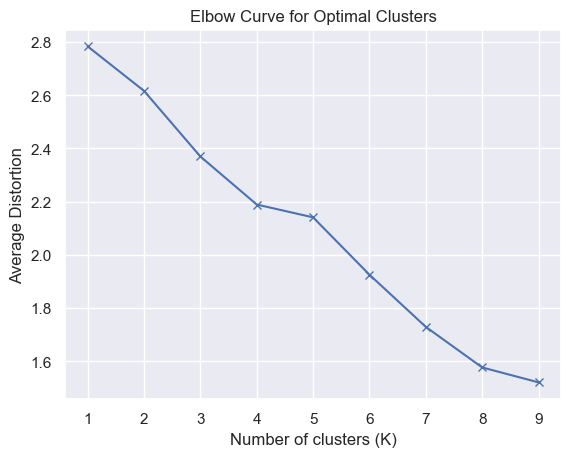

In [39]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    #pipe_kmn = Pipeline([('sc', scaler), ('kmeans', KMeans(n_clusters=k))]);
    #pipe_kmn.fit(X_train[features_n])
    kmeans = KMeans(n_clusters=k);
    kmeans.fit(X_train_scl)
    prediction=kmeans.predict(X_train_scl)
    meanDistortions.append(sum(np.min(cdist(X_train_scl, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train_scl.shape[0])

plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('Number of clusters (K)');
plt.ylabel('Average Distortion');
plt.title('Elbow Curve for Optimal Clusters');

In [40]:
# it look like 6 and 7 are bends in chart, explore cluster based on this
kmeans_mdl = KMeans(n_clusters=6,random_state = 51)
kmeans_mdl.fit(X_train_scl)
trn_pred = kmeans_mdl.predict(X_train_scl)
tst_pred = kmeans_mdl.predict(X_test_scl)
X_train['kmn_cluster'] = trn_pred
X_test['kmn_cluster'] = tst_pred

KMeans(n_clusters=6, random_state=51)

In [41]:
X_train['kmn_cluster'] = trn_pred
X_test['kmn_cluster'] = tst_pred

In [42]:
for i in features_n:
    print(f"Cluster summary for {i}")
    X_train.groupby(["kmn_cluster"])[i].describe()

Cluster summary for clnd_Actual Work hours per week (in hours)


count       mean        std   min   25%   50%   75%   max
kmn_cluster                                                           
0             11.0  47.681818   9.675414  35.0  41.0  45.0  52.5  70.0
1             13.0  52.076923  11.235817  40.0  45.0  50.0  54.0  84.0
2              7.0  49.714286   3.545621  44.0  49.0  50.0  50.0  56.0
3             15.0  49.666667  15.262778  34.0  40.0  45.0  57.0  84.0
4             11.0  47.636364   8.090398  40.0  40.0  45.0  54.5  60.0
5             24.0  49.791667   9.784545  40.0  45.0  48.0  51.0  84.0

Cluster summary for Actual_work_hours_per_desogmated_work_hours


count      mean       std       min       25%       50%  \
kmn_cluster                                                            
0             11.0  1.157197  0.413300  0.875000  1.000000  1.000000   
1             13.0  1.451068  1.131644  0.833333  1.000000  1.041667   
2              7.0  1.097222  0.091779  1.000000  1.020833  1.111111   
3             15.0  1.581049  1.305476  0.809524  1.000000  1.125000   
4             11.0  1.426263  1.194972  0.833333  1.000000  1.000000   
5             24.0  1.132688  0.174885  0.888889  1.000000  1.082784   

                  75%       max  
kmn_cluster                      
0            1.128472  2.333333  
1            1.155556  5.000000  
2            1.138889  1.250000  
3            1.400327  5.000000  
4            1.211111  5.000000  
5            1.212500  1.500000

Cluster summary for Clnd_Designated work hours per week that a person is expected to work (In hours)


count       mean        std   min    25%    50%     75%   max
kmn_cluster                                                               
0             11.0  42.500000   5.054701  30.0  40.00  45.00  45.000  48.0
1             13.0  50.461538  10.445217  40.0  45.00  48.00  54.000  72.0
2              7.0  45.428571   2.935821  40.0  44.50  45.00  48.000  48.0
3             15.0  46.900000   8.345658  35.0  42.25  48.00  48.000  72.0
4             11.0  45.545455   3.387141  40.0  45.00  45.00  48.000  50.0
5             24.0  43.937500   4.494713  40.0  40.00  43.75  45.125  56.0

Cluster summary for Marriage status/ Kids_Married and No Kids


count      mean       std  min  25%  50%  75%  max
kmn_cluster                                                    
0             11.0  0.181818  0.404520  0.0  0.0  0.0  0.0  1.0
1             13.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
2              7.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
3             15.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
4             11.0  0.090909  0.301511  0.0  0.0  0.0  0.0  1.0
5             24.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

Cluster summary for clnd_Working_City_Others


count      mean       std  min  25%  50%  75%  max
kmn_cluster                                                    
0             11.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1             13.0  0.307692  0.480384  0.0  0.0  0.0  1.0  1.0
2              7.0  0.142857  0.377964  0.0  0.0  0.0  0.0  1.0
3             15.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
4             11.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
5             24.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

Cluster summary for day_hrs_per_week


count      mean       std  min  25%  50%  75%  max
kmn_cluster                                                    
0             11.0  5.909091  0.301511  5.0  6.0  6.0  6.0  6.0
1             13.0  5.923077  0.277350  5.0  6.0  6.0  6.0  6.0
2              7.0  5.857143  0.377964  5.0  6.0  6.0  6.0  6.0
3             15.0  5.966667  0.129099  5.5  6.0  6.0  6.0  6.0
4             11.0  5.227273  0.343776  5.0  5.0  5.0  5.5  6.0
5             24.0  6.000000  0.000000  6.0  6.0  6.0  6.0  6.0

Cluster summary for clnd_Working_City_Bangalore


count  mean  std  min  25%  50%  75%  max
kmn_cluster                                           
0             11.0   1.0  0.0  1.0  1.0  1.0  1.0  1.0
1             13.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2              7.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3             15.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4             11.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5             24.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

Cluster summary for Please Mention your age in years


count       mean       std   min    25%   50%   75%   max
kmn_cluster                                                           
0             11.0  26.909091  3.015113  24.0  24.50  27.0  28.0  34.0
1             13.0  30.384615  4.174096  27.0  28.00  29.0  31.0  42.0
2              7.0  44.285714  4.855042  38.0  40.50  44.0  48.5  50.0
3             15.0  27.933333  3.634491  24.0  25.50  27.0  29.5  37.0
4             11.0  29.909091  3.113023  26.0  28.00  29.0  30.5  36.0
5             24.0  29.750000  4.245202  24.0  26.75  29.5  33.0  37.0

Cluster summary for enc_salary


count      mean       std  min  25%  50%  75%  max
kmn_cluster                                                    
0             11.0  2.545455  1.634848  1.0  1.0  2.0  3.5  6.0
1             13.0  2.461538  1.198289  1.0  2.0  2.0  2.0  5.0
2              7.0  5.285714  1.496026  3.0  5.0  5.0  5.5  8.0
3             15.0  1.733333  1.032796  1.0  1.0  1.0  2.5  4.0
4             11.0  4.909091  2.071451  2.0  3.5  5.0  6.5  8.0
5             24.0  2.458333  0.883627  1.0  2.0  2.0  3.0  4.0

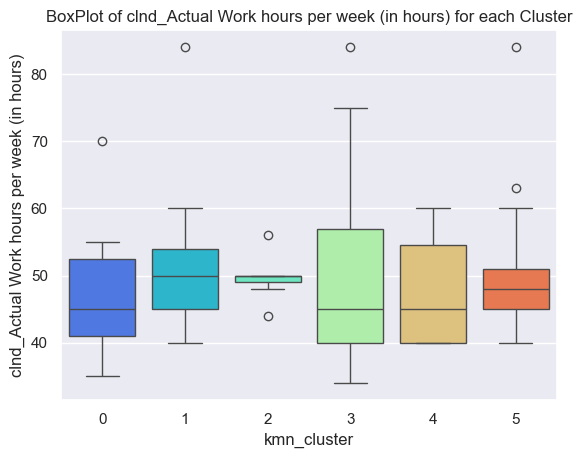

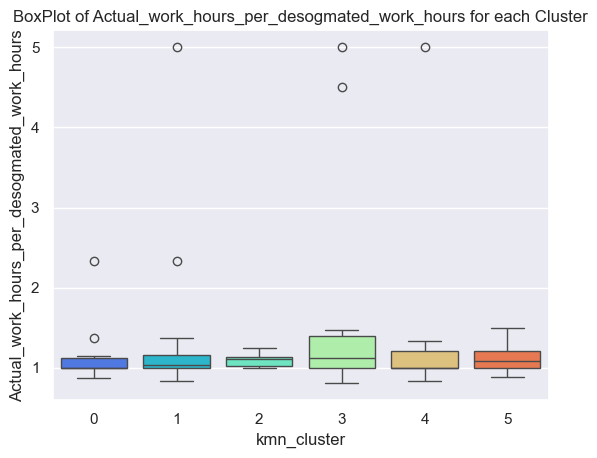

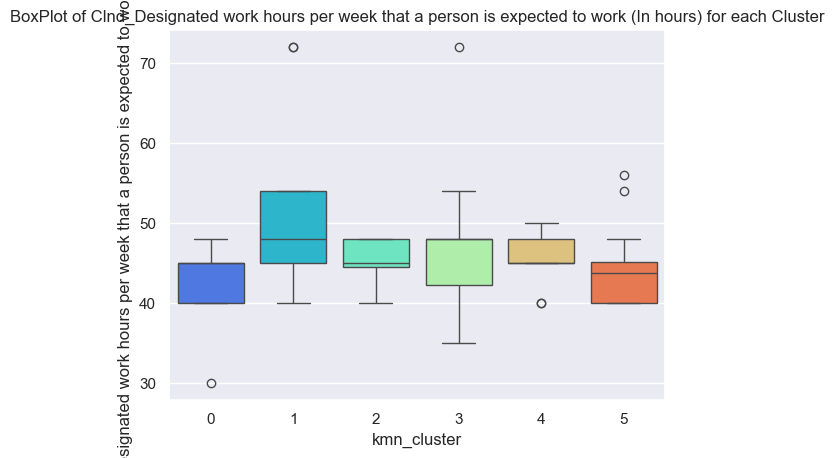

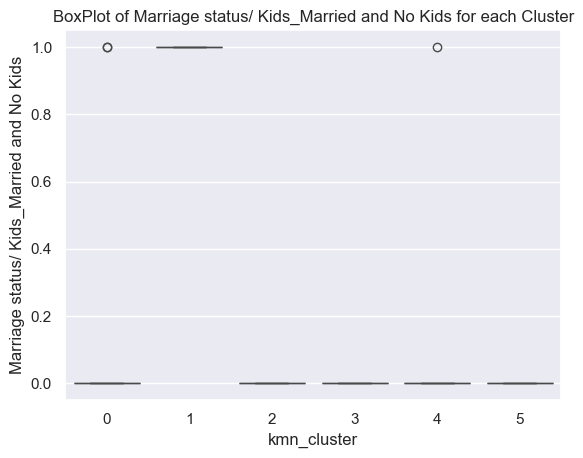

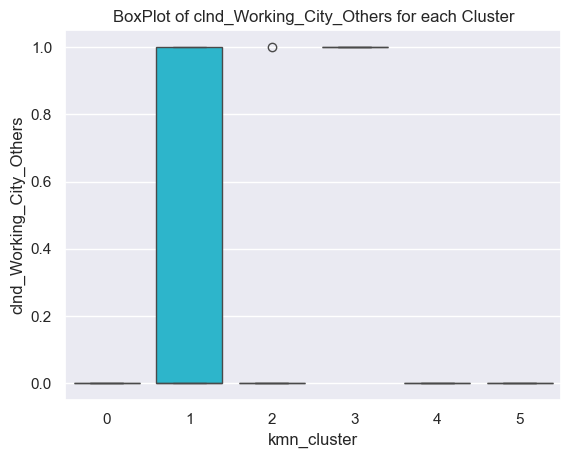

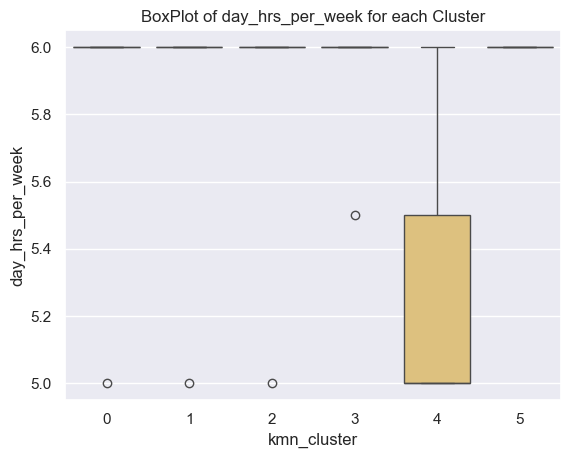

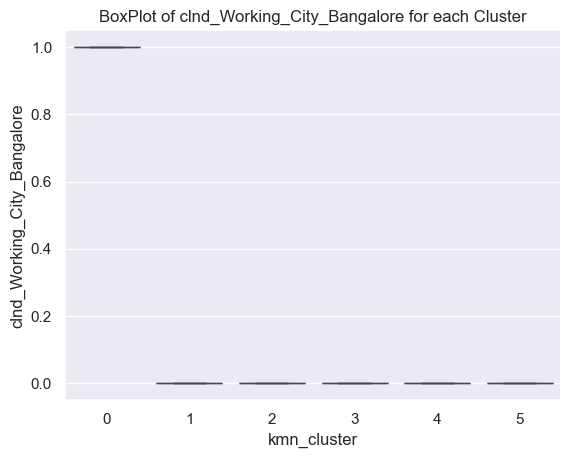

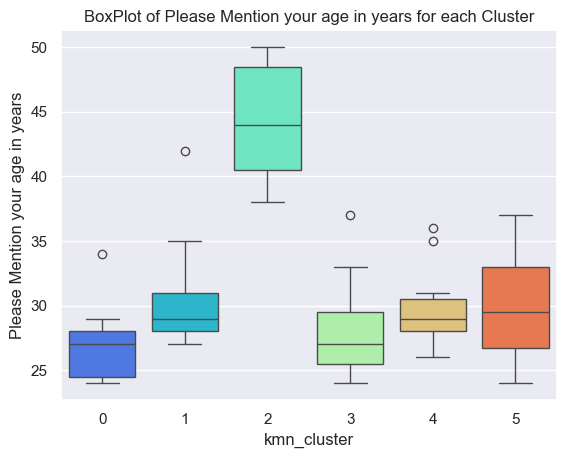

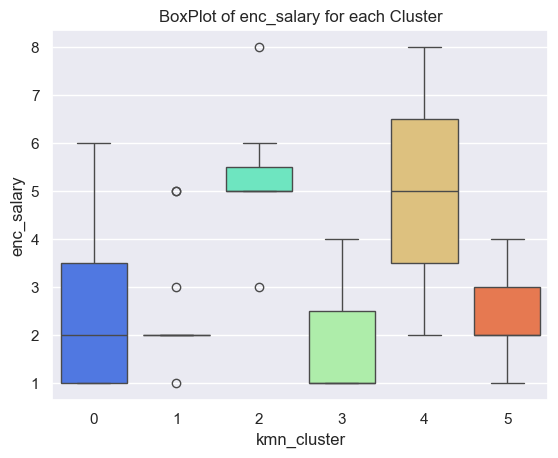

In [43]:
for i in features_n:
    pfig = plt.figure();
    img = sns.boxplot(x="kmn_cluster",y=i,data=X_train,palette='rainbow').set_title(f'BoxPlot of {i} for each Cluster');
    fig = img.get_figure();
    #fig.savefig(i);
    #fig.clf(); # run this for not printing figure

### Hierarchial_Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
agg_clstr = AgglomerativeClustering(n_clusters=3, metric='euclidean',  linkage='average')
agg_clstr.fit(X_train_scl)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [45]:
trn_pred = agg_clstr.fit_predict(X_train_scl)
X_train['agg_cluster'] = trn_pred

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

In [47]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

z = linkage(X_train_scl, metric='euclidean', method='average')
z[:2]

array([[13.        , 48.        ,  0.43177118,  2.        ],
       [38.        , 78.        ,  0.47428149,  2.        ]])

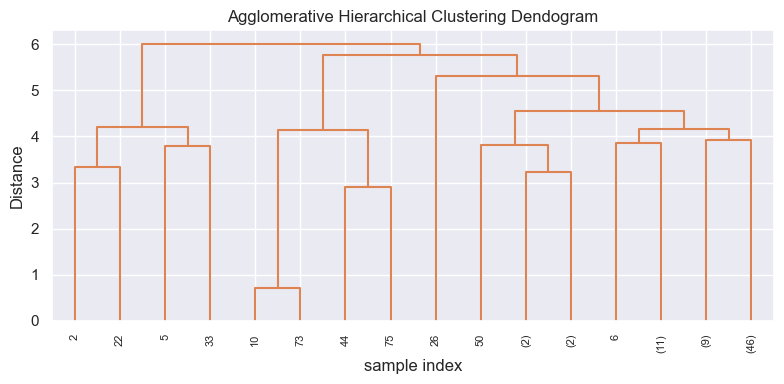

In [48]:
plt.figure(figsize=(8, 4));
plt.title('Agglomerative Hierarchical Clustering Dendogram');
plt.xlabel('sample index');
plt.ylabel('Distance');
dendrogram(z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8.,truncate_mode="level", p=5 );
plt.tight_layout();

### Linear Disciminant Analysis

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Initialize LDA
lda = LinearDiscriminantAnalysis()
# Fit and transform the data
#lda = lda.fit(X_train_scl, y_train)

In [50]:
pipe_lda = Pipeline([('sc', scaler), ('lda', lda)])
pipe_lda.fit(X_train[features_n], y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [51]:
X_train_lda = pipe_lda.transform(X_train[features_n])
y_train_pred = pipe_lda.predict(X_train[features_n])
X_test_lda = pipe_lda.transform(X_test[features_n])
y_test_pred = pipe_lda.predict(X_test[features_n])

In [52]:
estimator= pipe_lda
pred_bin_tr = estimator.predict(X_train[features_n])
pred_bin_te = estimator.predict(X_test[features_n])
#confusion_matrix(y_train,pred_bin_tr)
f'train_rocauc : {round(roc_auc_score(y_train,estimator.predict_proba(X_train[features_n])[:,1]),4)} ; \
test_rocaauc : {round(roc_auc_score(y_test,estimator.predict_proba(X_test[features_n])[:,1]),4)}'
f'train_f1_score : {round(f1_score(y_train,pred_bin_tr),4)} ; test_f1_score : {round(f1_score(y_test,pred_bin_te),4)}'
f'train_precision : {round(precision_score(y_train,pred_bin_tr),4)} ; test_precision : {round(precision_score(y_test,pred_bin_te),4)}'
f'train_recall : {round(recall_score(y_train,pred_bin_tr),4)} ; test_recall : {round(recall_score(y_test,pred_bin_te),4)}'
f'train_accuracy : {round(accuracy_score(y_train,pred_bin_tr),4)} ; test_accuracy : {round(accuracy_score(y_test,pred_bin_te),4)}'
#f'train_conf : {confusion_matrix(y_train,pred_bin_tr)} ; test_conf : {confusion_matrix(y_test,pred_bin_te)}'

'train_rocauc : 0.9792 ; test_rocaauc : 0.8267'

'train_f1_score : 0.9577 ; test_f1_score : 0.8814'

'train_precision : 0.9444 ; test_precision : 0.8966'

'train_recall : 0.9714 ; test_recall : 0.8667'

'train_accuracy : 0.9259 ; test_accuracy : 0.8'

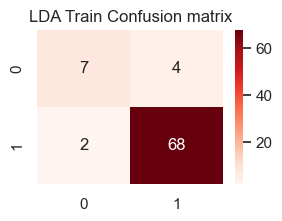

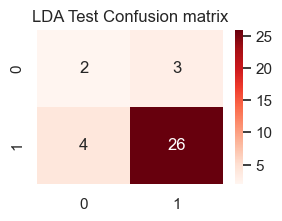

In [53]:
cf_tr = confusion_matrix(y_train,pred_bin_tr);#cf_tr
cf_te = confusion_matrix(y_test,pred_bin_te);#cf_te
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_tr, annot=True, cmap='Reds',fmt='.0f',).set_title('LDA Train Confusion matrix')
plt.show()
fig, ax = plt.subplots(figsize=(3,2)) ;
x = sns.heatmap(cf_te, annot=True, cmap='Reds',fmt='.0f',).set_title('LDA Test Confusion matrix')
plt.show()

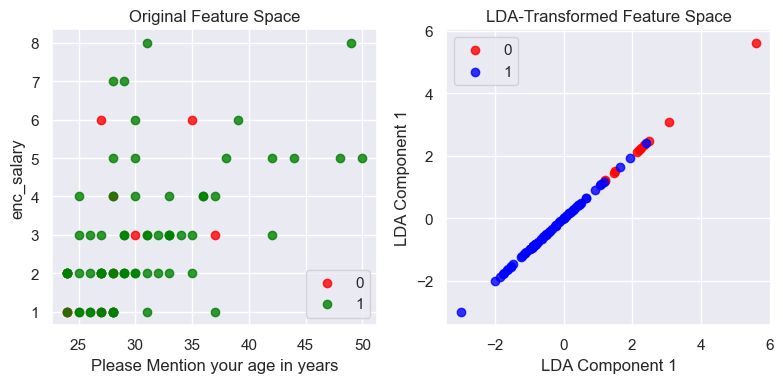

In [54]:
# Plot the original feature space and the LDA-transformed feature space side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4));

# Plot the original feature space
_= axes[0].set_title(f'Original Feature Space'); # ({features_n[0]} vs. {features_n[1]})
for color, i in zip(['red', 'green'], [0,1]):
    _= axes[0].scatter(X_train.loc[y_train == i, features_n[7]], X_train.loc[y_train  == i, features_n[8]], color=color, alpha=0.8, label=i);
_= axes[0].set_xlabel(features_n[7]);
_= axes[0].set_ylabel(features_n[8]);
_= axes[0].legend();


# Plot the LDA-transformed feature space
_= axes[1].set_title('LDA-Transformed Feature Space');
for color, i in zip(['red',  'blue'], [0,1]):
    _= axes[1].scatter(X_train_lda[y_train == i, ], X_train_lda[y_train == i, ], color=color, alpha=0.8, label=i);
_= axes[1].set_xlabel('LDA Component 1');
_= axes[1].set_ylabel('LDA Component 1');
_= axes[1].legend();

_= plt.tight_layout()
plt.show()

### The End